Comenzamos importando las librerias...

In [49]:
import pandas as pd
import numpy as np

Extraemos los datos del CSV

In [50]:
df = pd.read_csv("ObesityLevelsFinal.csv")

Mostramos los datos

In [51]:
df.head()

,Obesity,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,1,0.347845,1.0,-0.345456,2.457898,-1.365458,-2.895565,-0.326598,-0.212545,-0.235655,2.632366,0.658965,1.0,3.254587,-1.987458,-0.365878,-1.542123
1,1,0.347845,1.0,-0.345456,2.457898,1.565896,2.321254,-0.326598,-0.875454,-0.235655,2.632366,0.658965,-1.0,3.254587,1.345879,-0.365878,-1.542123
2,1,1.124578,1.0,-0.345456,2.457898,-1.365458,-2.895565,-0.326598,0.654587,-0.235655,2.632366,0.658965,1.0,-0.351254,-1.987458,-1.326598,-1.542123
3,1,1.124578,-1.0,0.123212,2.457898,-1.365458,-2.895565,-0.326598,-0.212545,-0.235655,2.632366,-1.254654,1.0,1.124578,0.178989,-1.326598,-1.542123
4,0,0.347845,1.0,0.123212,2.457898,-1.365458,-2.895565,-0.326598,0.654587,-0.235655,2.632366,-1.254654,1.0,1.124578,0.178989,-0.365878,-1.542123


Obtenemos la correlacion de las variables

In [52]:
df.corr()

,Obesity,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
Obesity,1.000000,0.029587,-0.261775,0.034330,0.101964,0.082447,-0.010659,-0.771258,-0.057769,-0.067742,-0.008819,0.018896,0.009395,-0.032801,-0.108652,0.063318,0.004217
Age,0.029587,1.000000,0.020271,0.046914,0.335758,0.102925,0.082174,-0.076566,0.099342,0.156789,0.055043,0.000437,0.259885,0.130052,-0.243614,-0.080357,0.193022
Gender,-0.261775,0.020271,1.000000,-0.563127,0.176982,-0.018943,0.064934,0.229027,-0.072271,0.102633,0.044698,-0.125991,0.103649,-0.118906,0.037984,-0.091402,-0.016570
Height,0.034330,0.046914,-0.563127,1.000000,-0.474083,-0.090939,-0.223104,-0.001136,0.207879,-0.143875,-0.013388,0.215718,-0.307699,0.182894,-0.059461,0.095125,0.002251
Weight,0.101964,0.335758,0.176982,-0.474083,1.000000,0.220720,0.283227,-0.152231,0.077179,0.209084,0.007425,-0.174634,0.520520,0.031618,-0.118778,-0.230696,0.100901
CALC,0.082447,0.102925,-0.018943,-0.090939,0.220720,1.000000,0.113056,-0.036651,-0.010710,0.012322,0.063219,-0.066789,-0.035648,0.114831,-0.106149,-0.082824,0.023561
FAVC,-0.010659,0.082174,0.064934,-0.223104,0.283227,0.113056,1.000000,0.018560,0.018737,0.190658,-0.050660,-0.007778,0.207382,0.067253,0.050617,-0.129734,0.199545
FCVC,-0.771258,-0.076566,0.229027,-0.001136,-0.152231,-0.036651,0.018560,1.000000,0.018513,0.060136,-0.009839,0.004518,-0.052808,0.047523,0.119869,-0.057968,-0.001287
NCP,-0.057769,0.099342,-0.072271,0.207879,0.077179,-0.010710,0.018737,0.018513,1.000000,-0.020351,0.004095,0.023146,-0.002117,0.156106,0.009452,-0.113519,-0.010537
SCC,-0.067742,0.156789,0.102633,-0.143875,0.209084,0.012322,0.190658,0.060136,-0.020351,1.000000,-0.047731,-0.004760,0.184968,0.036589,-0.014230,-0.087678,0.061582


Graficamos la correlacion

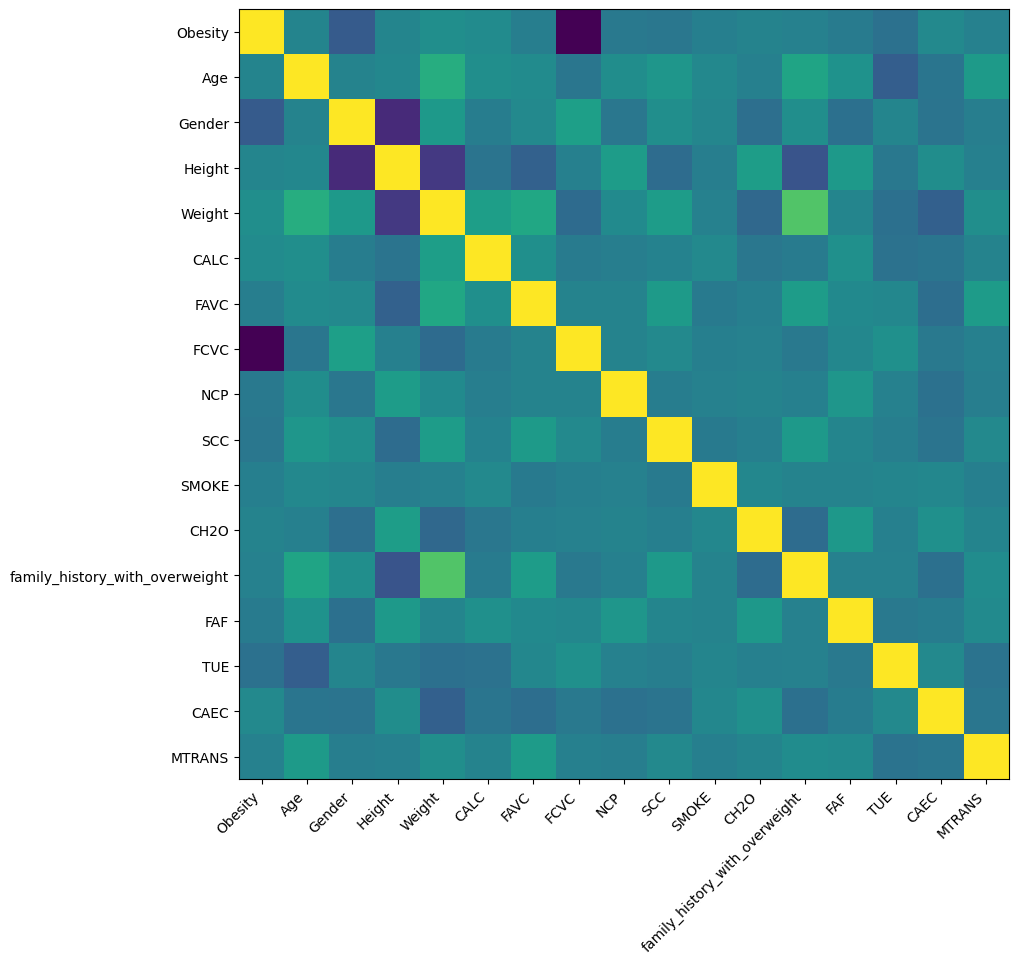

In [53]:
import matplotlib.pyplot as plt
labels = df.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df.columns.to_list(), ha='right');

Defino características y etiquetas que me interesan y estandarizo las etiquetas dividiendo cada columna de estas por el maximo de esa columna para que sean datos entre 0 y 1


In [54]:
features = ["Age","Gender","Height","Weight","FCVC",
            "NCP","SCC"]

df[features] = df[features] / df[features].max()

In [55]:
#Muestro las variables que voy a utilizar y Obesity 
df.loc[:, ["Obesity"] + features].head(10)

,Obesity,Age,Gender,Height,Weight,FCVC,NCP,SCC
0,1,0.185176,1.0,-0.76391,1.00000,-0.104525,-0.324701,-0.070017
1,1,0.185176,1.0,-0.76391,1.00000,-0.104525,-1.337414,-0.070017
2,1,0.598672,1.0,-0.76391,1.00000,-0.104525,1.000000,-0.070017
3,1,0.598672,-1.0,0.27246,1.00000,-0.104525,-0.324701,-0.070017
4,0,0.185176,1.0,0.27246,1.00000,-0.104525,1.000000,-0.070017
5,1,0.185176,-1.0,0.27246,1.00000,-0.104525,1.000000,-0.070017
6,1,-0.308097,1.0,-0.76391,0.76177,-0.104525,-0.324701,-0.070017
7,1,0.598672,1.0,0.27246,0.76177,-0.104525,-0.324701,-0.070017
8,1,0.598672,1.0,-0.76391,0.76177,-0.104525,-0.324701,-0.070017
9,1,0.598672,1.0,-0.76391,0.76177,-0.104525,-0.324701,-0.070017


Grafico las de mi interes

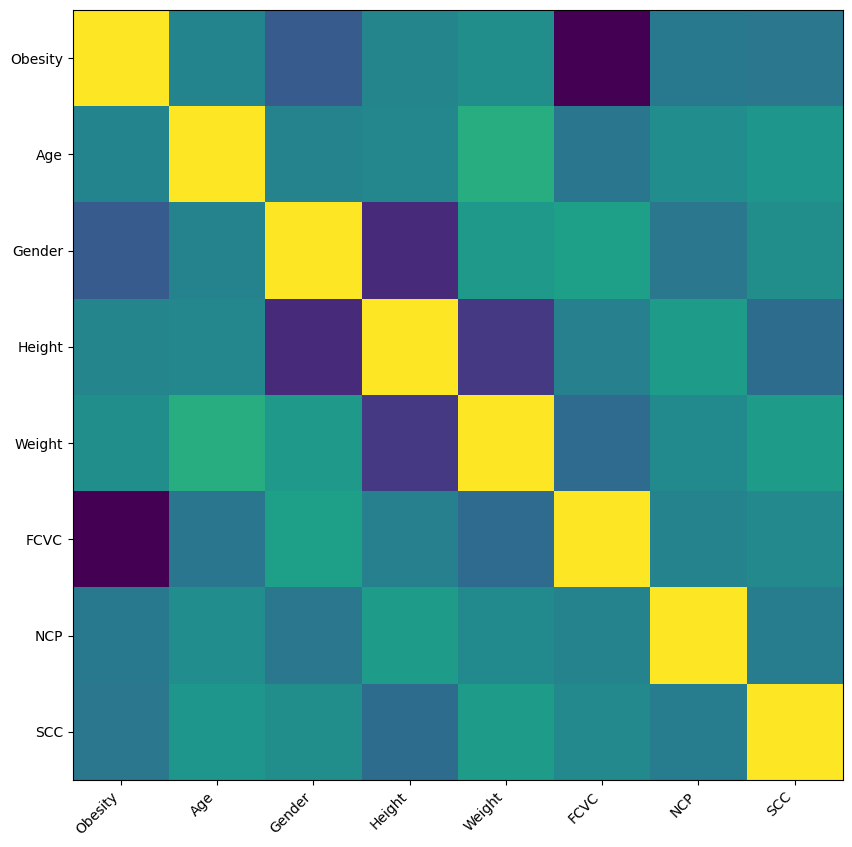

In [56]:
labels = df.loc[:, ["Obesity"] + features].columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df.loc[:, ["Obesity"] + features].corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df.loc[:, ["Obesity"] + features].columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df.loc[:, ["Obesity"] + features].columns.to_list(), ha='right');

Dividimos los datos de prueba y entrenamiento

In [57]:
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

X = df[features].values
Y = df["Obesity"].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

Hacemos el Forward Propagation

In [58]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
np.random.seed(8)
# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(1, 7)
w_output = np.random.rand(1, 4)

b_hidden = np.random.rand(4, 1)
b_output = np.random.rand(1, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))


# Función para propagar hacia adelante (forward propagation)
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    #print(f'{Z1=}')
    A1 = relu(Z1)
    #print(f'{A1=}')
    Z2 = w_output @ A1 + b_output
    #print(f'{Z2=}')
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

1407


Hacemos el calculo de precision

In [59]:
# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convierto las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calculo la precisión comparando las predicciones con las etiquetas reales

print("ACCURACY: ", accuracy)

ACCURACY:  0.390625


Hacemos el Backward Propagation para entrenar la red neuronal

In [60]:
accuracy_test_l = []
accuracy_train_l = []
cont = 0
L = 0.005  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutamos descenso de gradiente
for i in tqdm(range(100000)):
    cont += 1
    # Seleccionamos aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # Pasamos los datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # Distribuimos el error a través de la retropropagación
    # y devolvemos pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # Actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2
    
    if (cont % 1000) == 0 :
        # Cálculo de precisión del test
        test_predictions = forward_prop(X_test.transpose())[3]
        test_predictions = (test_predictions >= 0.5).astype(int)  # Convertimos las predicciones en valores binarios (0 o 1)
        accuracy_TEST = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calculamos la precisión comparando las predicciones con las etiquetas reales
        accuracy_test_l.append(accuracy_TEST)

        # Cálculo de precisión del train
        train_predictions = forward_prop(X_train.transpose())[3]
        train_predictions = (train_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
        accuracy_TRAIN = np.mean(train_predictions == Y_train.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
        accuracy_train_l.append(accuracy_TRAIN)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [61]:
# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales

print("ACCURACY: ", accuracy)

ACCURACY:  0.9204545454545454


Graficamos la memoria de la precision a medida que vamos iterando

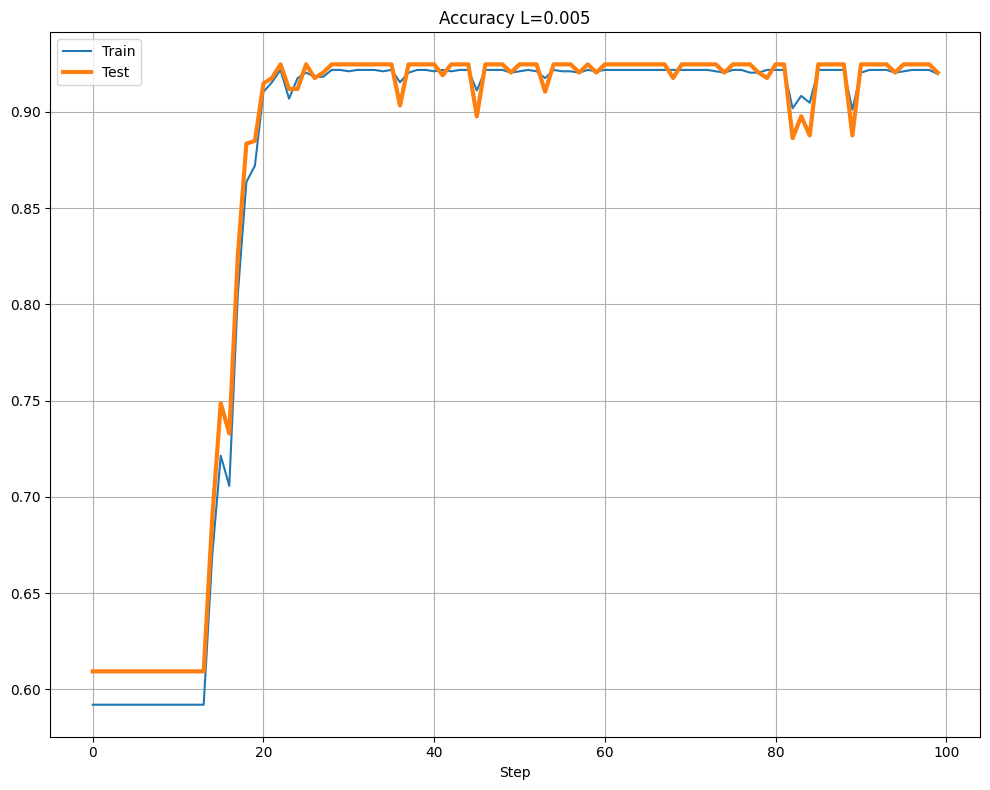

In [62]:
import matplotlib.pyplot as plt

fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw' : 3,
}
fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw' : 3,
}

fig, (ax) = plt.subplots(1,1,figsize=(10,8))

ax.plot(accuracy_train_l, label='Train')
ax.plot(accuracy_test_l, label='Test', **fmt_test)
ax.grid(which='both')
ax.legend()

ax.set_title(f'Accuracy {L=}')
ax.set_xlabel('Step')

fig.tight_layout()

plt.show()

Creamos una red neuronal en forma de funcion que luego usaremos para modificar las iteraciones y los pasos de la red

In [63]:
def red_de_prueba(L, iters):
    accuracy_test_l = []
    accuracy_train_l = []
    cont = 0
    # Número de registros de entrenamiento
    n = X_train.shape[0]
    print(n)
    np.random.seed(6)
    # Inicializar los pesos y sesgos de la red neuronal
    w_hidden = np.random.rand(1, 7)
    w_output = np.random.rand(1, 4)

    b_hidden = np.random.rand(4, 1)
    b_output = np.random.rand(1, 1)

    # Funciones de activación
    relu = lambda x: np.maximum(x, 0)
    logistic = lambda x: 1 / (1 + np.exp(-x))

    # Forward propagation
    def forward_prop(X):
        Z1 = w_hidden @ X + b_hidden
        A1 = relu(Z1)
        Z2 = w_output @ A1 + b_output
        A2 = logistic(Z2)
        return Z1, A1, Z2, A2
    # Devuelve pendientes para pesos y sesgos
    # usando la regla de la cadena
    
    def backward_prop(Z1, A1, Z2, A2, X, Y):
        dC_dA2 = 2 * A2 - 2 * Y
        dA2_dZ2 = logistic(Z2)
        dZ2_dA1 = w_output
        dZ2_dW2 = A1
        dZ2_dB2 = 1
        dA1_dZ1 = relu(Z1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

        dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

        dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

        dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

        dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

        dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2

    # Ejecutamos descenso de gradiente
    for i in tqdm(range(iters)):
        cont += 1
        # Seleccionamos aleatoriamente un conjunto de datos de entrenamiento
        idx = np.random.choice(n, 1, replace=False)
        X_sample = X_train[idx].transpose()
        Y_sample = Y_train[idx]

        # Pasamos datos seleccionados aleatoriamente a través de la red neuronal
        Z1, A1, Z2, A2 = forward_prop(X_sample)

        # Distribuimos el error a través de la retropropagación
        # y devolvemos pendientes para pesos y sesgos
        dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

        # Actualizar pesos y sesgos
        w_hidden -= L * dW1
        b_hidden -= L * dB1
        w_output -= L * dW2
        b_output -= L * dB2
        if (cont % 1000) == 0 :
            # Cálculo de precisión del test
            test_predictions = forward_prop(X_test.transpose())[3]
            test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
            accuracy_TEST = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
            accuracy_test_l.append(accuracy_TEST)

            # Cálculo de precisión del train
            train_predictions = forward_prop(X_train.transpose())[3]
            train_predictions = (train_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
            accuracy_TRAIN = np.mean(train_predictions == Y_train.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
            accuracy_train_l.append(accuracy_TRAIN)
            
    # Cálculo de precisión
    test_predictions = forward_prop(X_test.transpose())[3]
    test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
    accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
    print("ACCURACY: ", accuracy)
    import matplotlib.pyplot as plt
    fmt_train = {
        'color': 'tab:blue',
        'ls': 'solid',
        'lw' : 3,
    }
    fmt_test = {
        'color': 'tab:orange',
        'ls': 'solid',
        'lw' : 3,
    }

    fig, (ax) = plt.subplots(1,1,figsize=(10,8))

    ax.plot(accuracy_train_l, label='Train')
    ax.plot(accuracy_test_l, label='Test', **fmt_test)
    ax.grid(which='both')
    ax.legend()

    ax.set_title(f'Accuracy {L=}')
    ax.set_xlabel('Step')

    fig.tight_layout()

    plt.show()

Aqui usamos la funcion de la red neuronal pasandole diferentes parametros de pasos e iteraciones para encontrar la que mas precision tenga

1407


  0%|          | 0/1000 [00:00<?, ?it/s]

ACCURACY:  0.6306818181818182


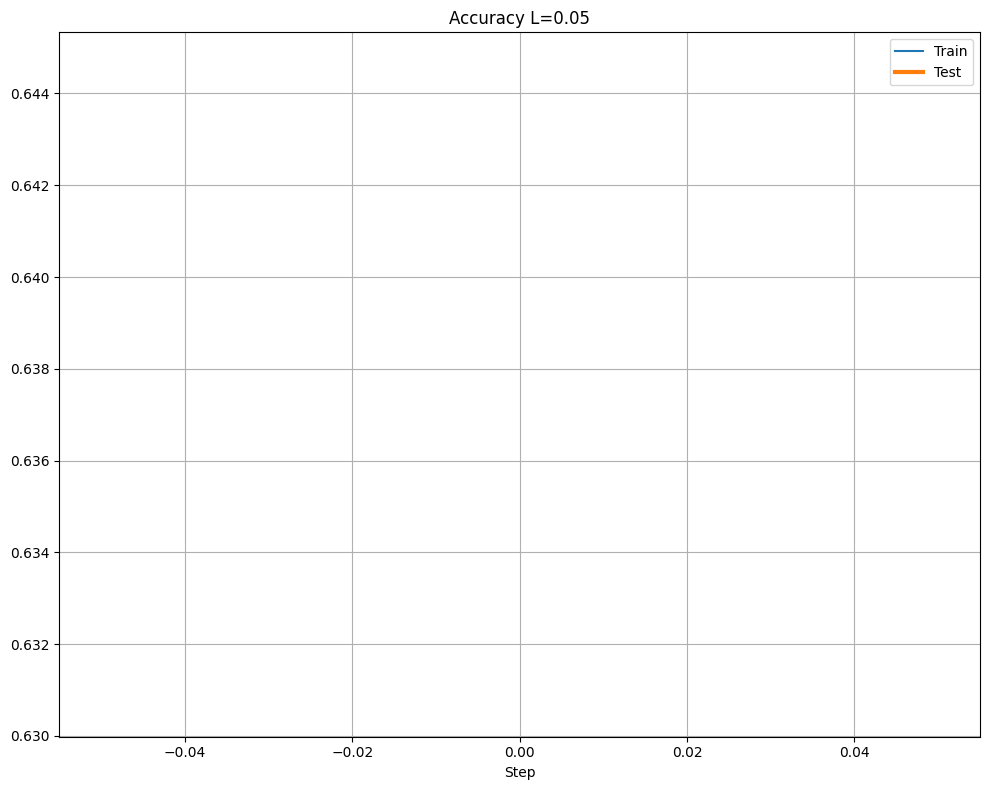

1407


  0%|          | 0/1000 [00:00<?, ?it/s]

ACCURACY:  0.6079545454545454


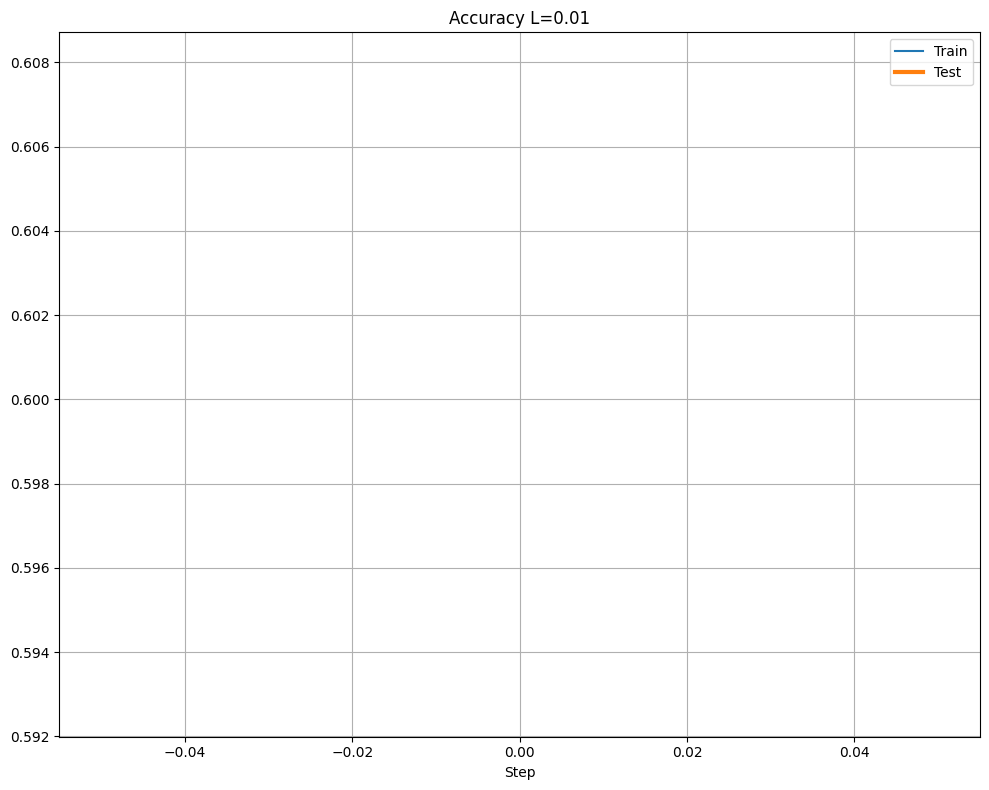

1407


  0%|          | 0/1000 [00:00<?, ?it/s]

ACCURACY:  0.5909090909090909


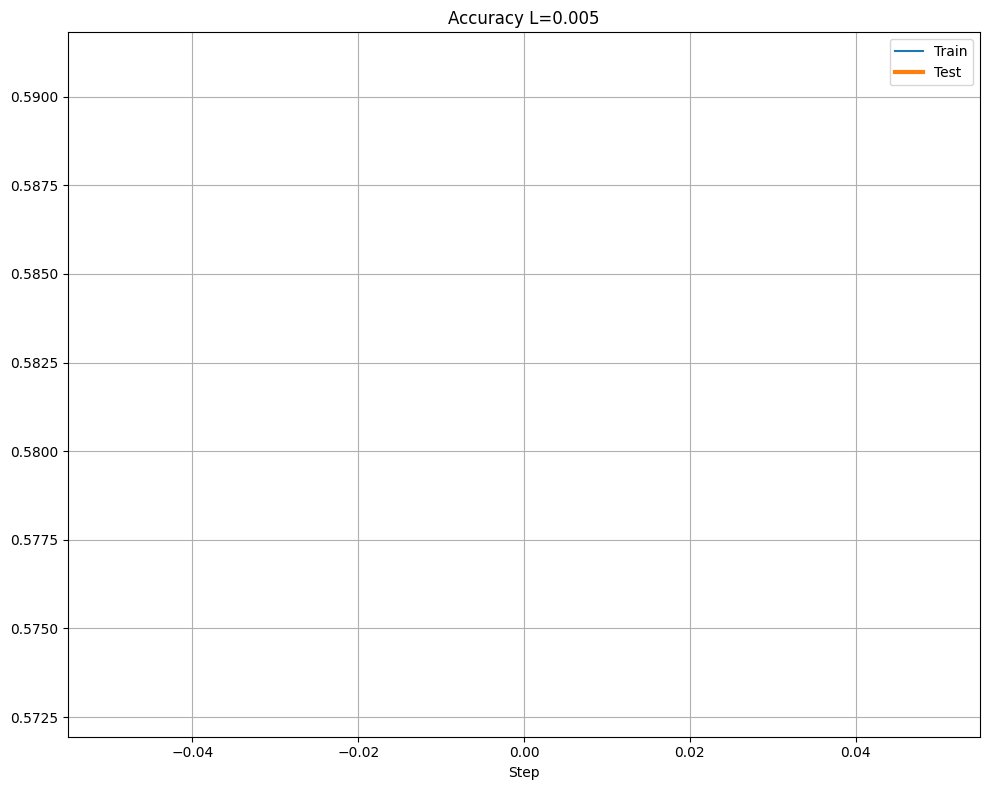

1407


  0%|          | 0/1000 [00:00<?, ?it/s]

ACCURACY:  0.390625


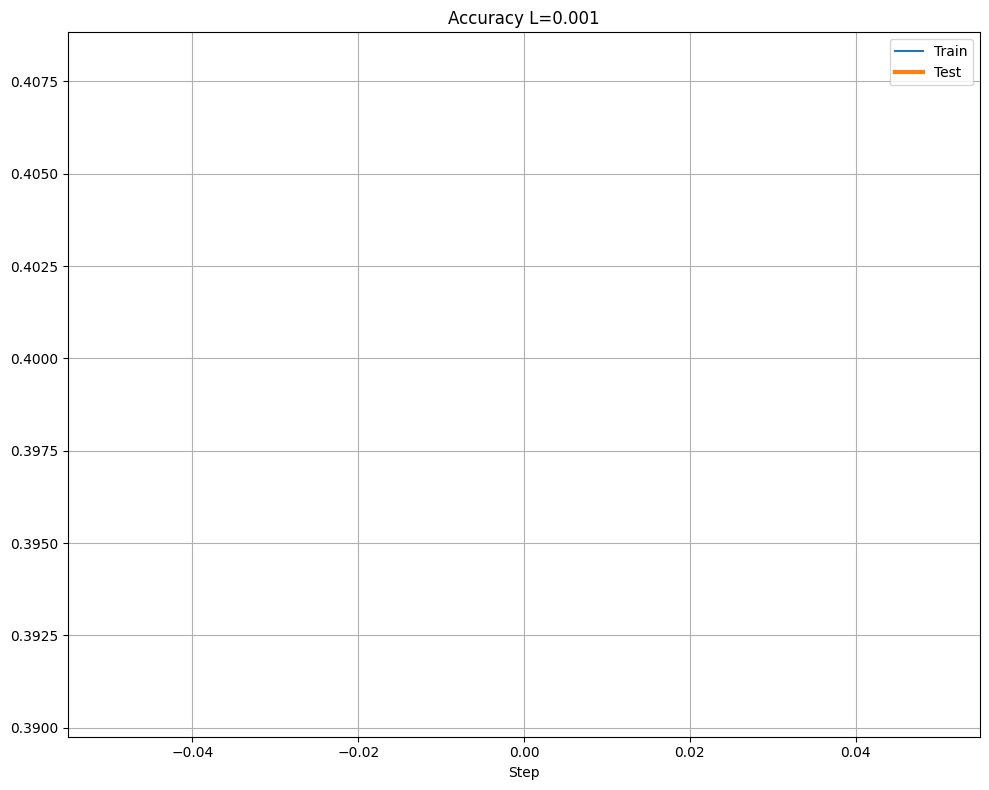

1407


  0%|          | 0/10000 [00:00<?, ?it/s]

ACCURACY:  0.9247159090909091


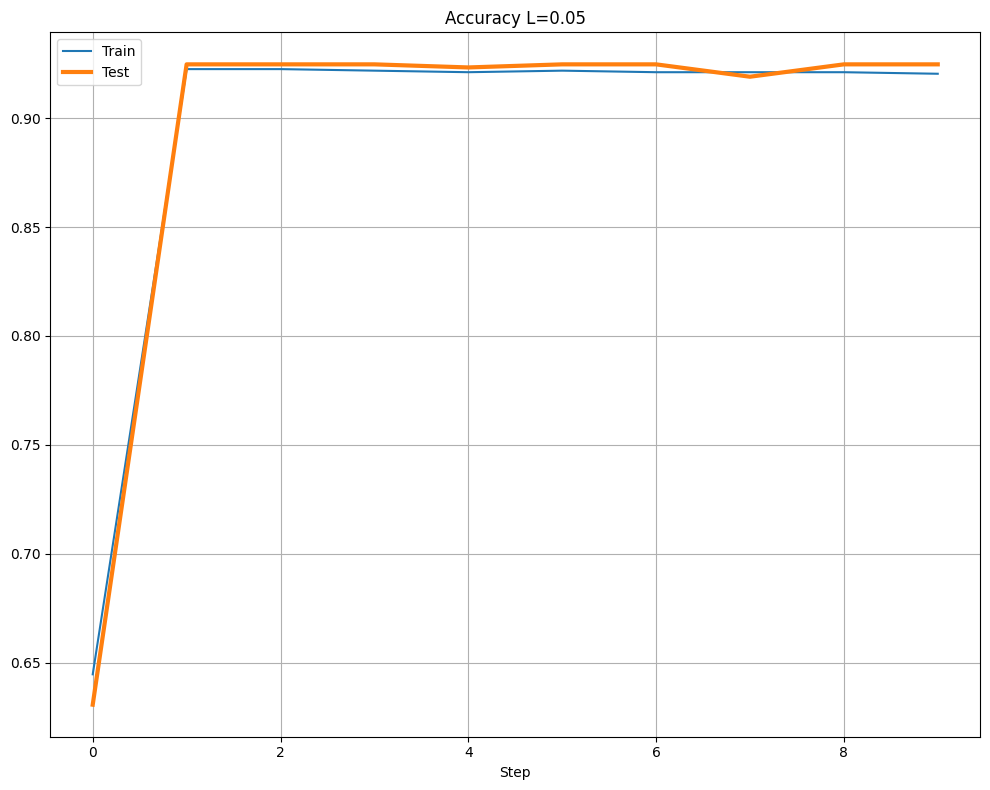

1407


  0%|          | 0/10000 [00:00<?, ?it/s]

ACCURACY:  0.8238636363636364


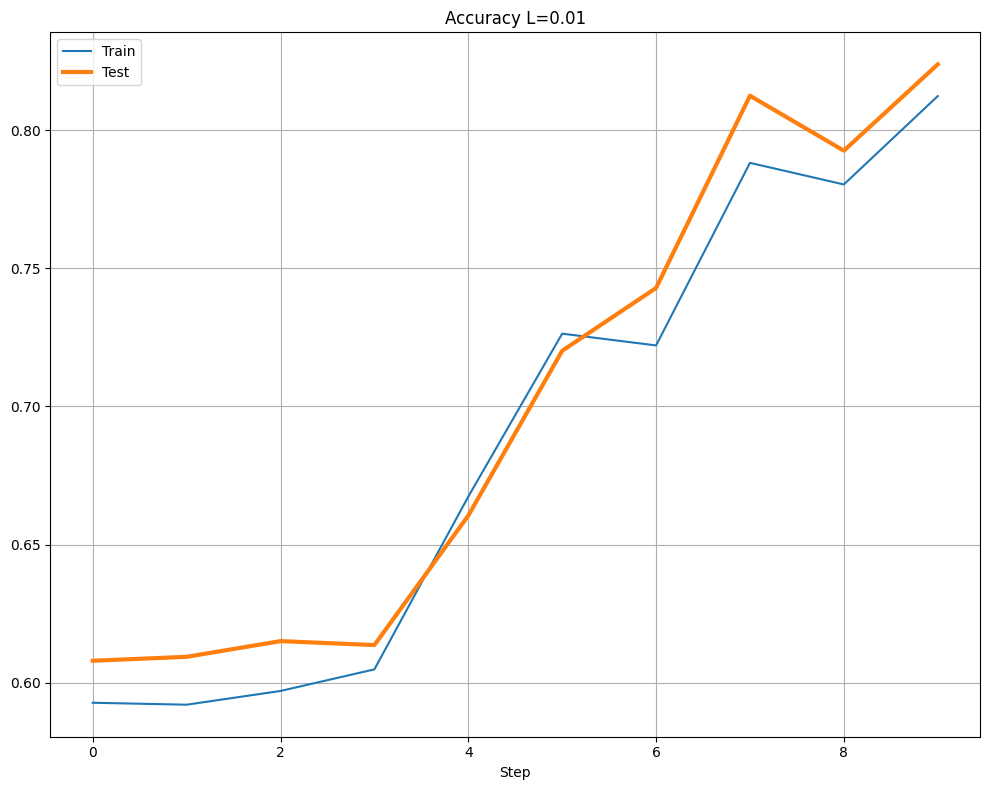

1407


  0%|          | 0/10000 [00:00<?, ?it/s]

ACCURACY:  0.6193181818181818


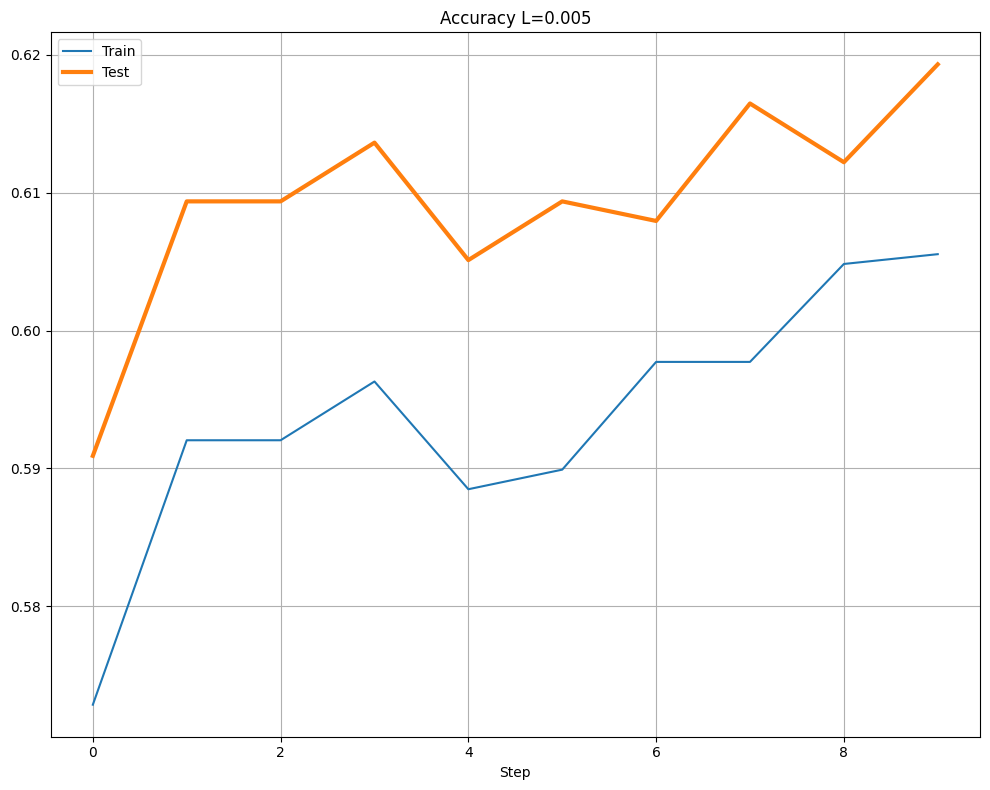

1407


  0%|          | 0/10000 [00:00<?, ?it/s]

ACCURACY:  0.609375


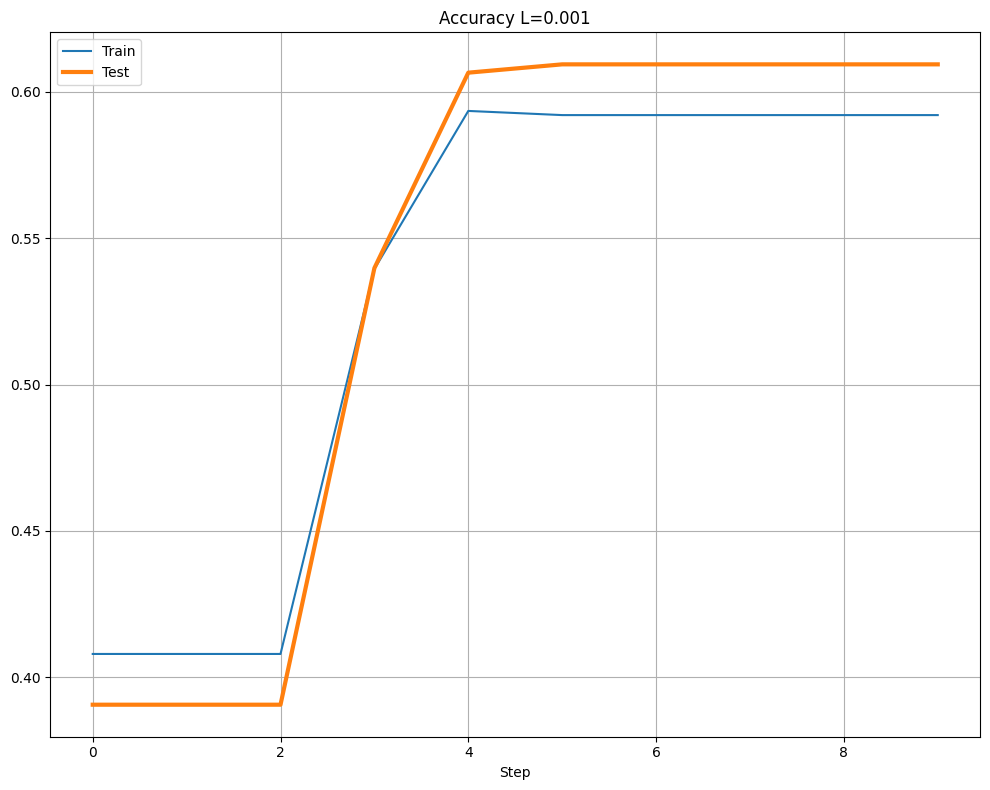

1407


  0%|          | 0/100000 [00:00<?, ?it/s]

ACCURACY:  0.9247159090909091


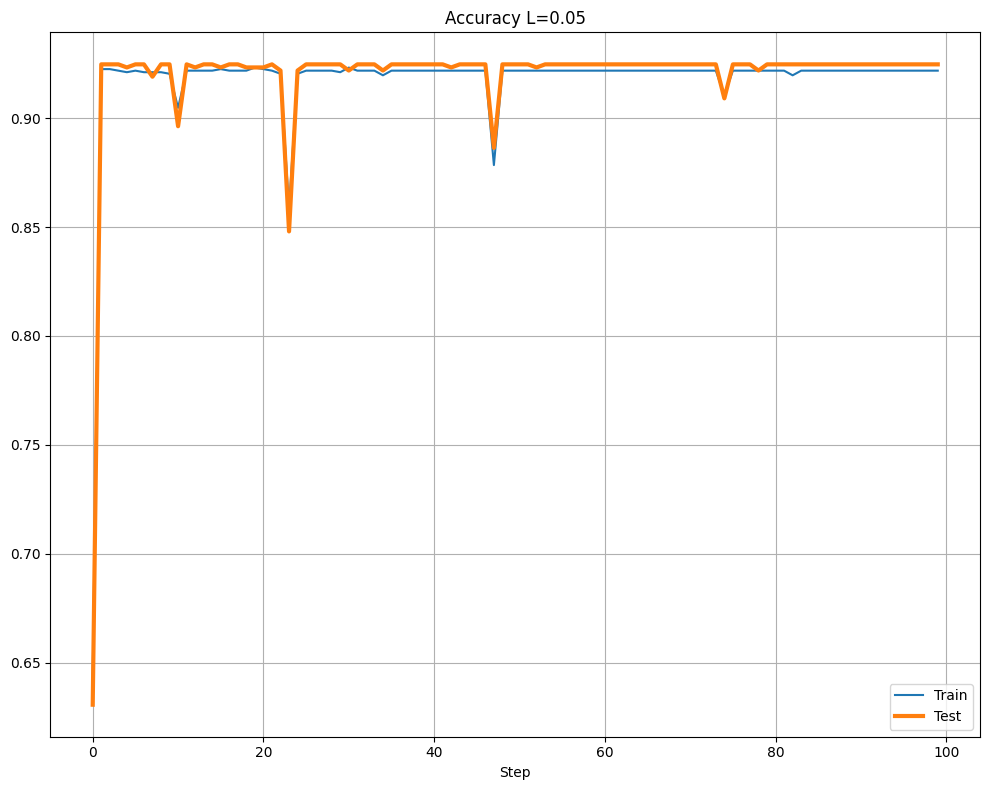

1407


  0%|          | 0/100000 [00:00<?, ?it/s]

ACCURACY:  0.9190340909090909


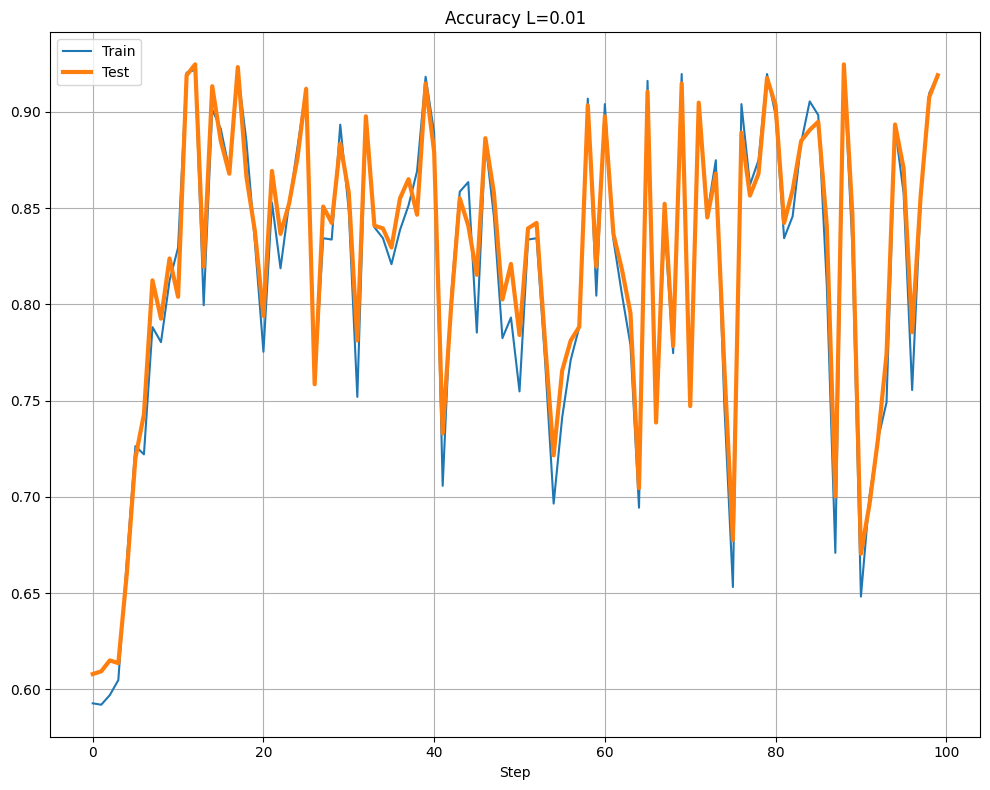

1407


  0%|          | 0/100000 [00:00<?, ?it/s]

ACCURACY:  0.9232954545454546


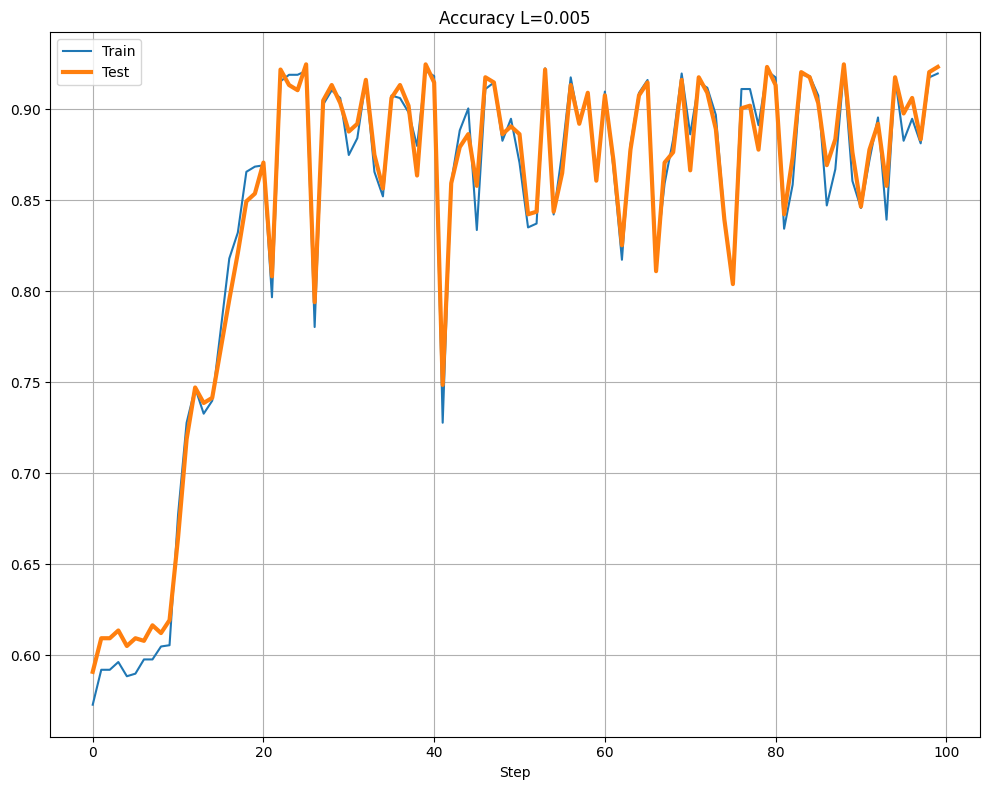

1407


  0%|          | 0/100000 [00:00<?, ?it/s]

ACCURACY:  0.7244318181818182


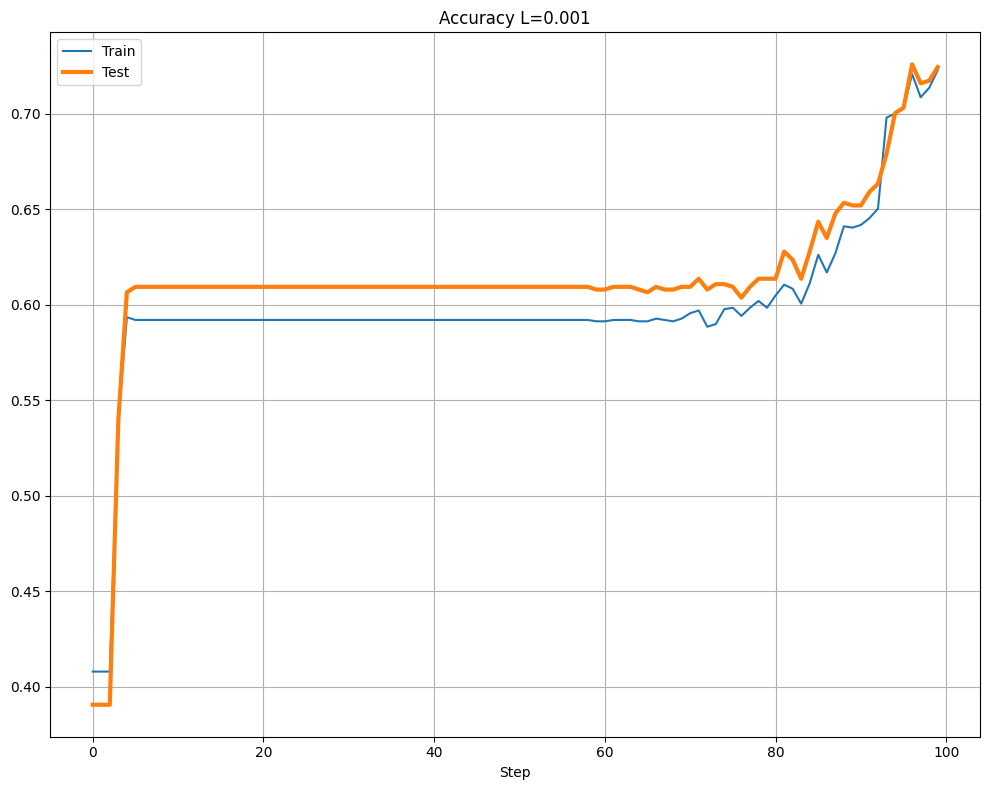

In [64]:
iters_l = [1000,10000,100000]
L_l = [0.05,0.01,0.005,0.001]
for iter in iters_l:
    for L in L_l :
        red_de_prueba(L=L, iters=iter)

Definimos características de entrada para los nuevos datos.
Buscamos 15 filas aleatorias del Dataframe que ya estan escaladas para poder probar el rendimiento de la red neuronal

In [65]:
new_features = ["Age","Gender","Height","Weight","FCVC",
                "NCP","SCC"]

filas_de_prueba = df.loc[:, ["Obesity"] + features].sample(n=15)

# Imprimir las filas aleatorias
filas_de_prueba

,Obesity,Age,Gender,Height,Weight,FCVC,NCP,SCC
1854,0,-0.667883,1.0,0.272460,-0.628772,1.000000,-0.324701,-0.070017
525,1,-1.230864,1.0,-0.763910,0.094538,0.437082,-1.337414,-0.070017
1109,0,-0.667883,-1.0,1.000000,-1.036978,1.000000,-0.324701,-0.070017
249,1,0.598672,1.0,-0.763910,0.761770,0.437082,-0.324701,1.000000
29,1,-0.308097,-1.0,0.784061,-0.277523,-0.104525,-0.324701,-0.070017
463,1,0.185176,-1.0,0.784061,0.094538,0.437082,-0.324701,-0.070017
407,1,0.185176,-1.0,0.272460,0.503091,0.437082,-1.337414,-0.070017
1149,0,-0.667883,-1.0,0.784061,-1.036978,1.000000,-0.324701,-0.070017
2040,0,0.185176,1.0,0.784061,-1.450613,1.000000,-0.324701,-0.070017
1198,0,0.185176,1.0,-0.763910,1.000000,1.000000,-1.337414,-0.070017


In [66]:
# Eliminamos la columna 'Obesity' del DataFrame 'filas_de_prueba'
df_ejemplos = filas_de_prueba.drop(columns=["Obesity"])

# Imprimimos el DataFrame después de eliminar la columna
df_ejemplos

,Age,Gender,Height,Weight,FCVC,NCP,SCC
1854,-0.667883,1.0,0.272460,-0.628772,1.000000,-0.324701,-0.070017
525,-1.230864,1.0,-0.763910,0.094538,0.437082,-1.337414,-0.070017
1109,-0.667883,-1.0,1.000000,-1.036978,1.000000,-0.324701,-0.070017
249,0.598672,1.0,-0.763910,0.761770,0.437082,-0.324701,1.000000
29,-0.308097,-1.0,0.784061,-0.277523,-0.104525,-0.324701,-0.070017
463,0.185176,-1.0,0.784061,0.094538,0.437082,-0.324701,-0.070017
407,0.185176,-1.0,0.272460,0.503091,0.437082,-1.337414,-0.070017
1149,-0.667883,-1.0,0.784061,-1.036978,1.000000,-0.324701,-0.070017
2040,0.185176,1.0,0.784061,-1.450613,1.000000,-0.324701,-0.070017
1198,0.185176,1.0,-0.763910,1.000000,1.000000,-1.337414,-0.070017


In [67]:
df_ejemplos.describe()


,Age,Gender,Height,Weight,FCVC,NCP,SCC
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,-0.062909,0.200000,0.332725,-0.215953,0.701198,-0.438930,0.001318
std,0.551924,1.014185,0.628775,0.822219,0.356771,0.575442,0.276277
min,-1.230864,-1.000000,-0.763910,-1.450613,-0.104525,-1.337414,-0.070017
25%,-0.487990,-1.000000,0.272460,-0.832875,0.437082,-0.324701,-0.070017
50%,0.185176,1.000000,0.272460,-0.277523,1.000000,-0.324701,-0.070017
75%,0.185176,1.000000,0.784061,0.298814,1.000000,-0.324701,-0.070017
max,0.598672,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Utilizamos la red neuronal para predecir en cada uno de los ejemplos



In [68]:
for ID, row in df_ejemplos.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertimos la fila en una matriz de una sola fila
    
    # Propagamos hacia adelante el ejemplo actual a través de la red neuronal
    Z1_new, A1_new, Z2_new, A2_new = forward_prop(ejemplo_actual.transpose())

    # Obtenemos la predicción (0 para Exceso de peso y 1 para un Peso normal) usando un umbral de 0.5
    prediccion_actual = (A2_new > 0.5).astype(int)
    
    if(prediccion_actual == 1):
        prediccion_actual = "No obesa"
    else: prediccion_actual = "Obesa"

    # Mostrar la predicción actual
    print("Predicción para el ejemplo", ID, ":", prediccion_actual)
    print("Activaciones de la capa de salida para el ejemplo", ID, ":", A2_new)
    print(" ")
    print(" ")

Predicción para el ejemplo 1854 : Exceso de peso
Activaciones de la capa de salida para el ejemplo 1854 : [[0.0122865]]
 
 
Predicción para el ejemplo 525 : Peso normal
Activaciones de la capa de salida para el ejemplo 525 : [[0.66501873]]
 
 
Predicción para el ejemplo 1109 : Exceso de peso
Activaciones de la capa de salida para el ejemplo 1109 : [[0.02611884]]
 
 
Predicción para el ejemplo 249 : Exceso de peso
Activaciones de la capa de salida para el ejemplo 249 : [[0.49931269]]
 
 
Predicción para el ejemplo 29 : Peso normal
Activaciones de la capa de salida para el ejemplo 29 : [[0.93518544]]
 
 
Predicción para el ejemplo 463 : Peso normal
Activaciones de la capa de salida para el ejemplo 463 : [[0.83112364]]
 
 
Predicción para el ejemplo 407 : Peso normal
Activaciones de la capa de salida para el ejemplo 407 : [[0.84934613]]
 
 
Predicción para el ejemplo 1149 : Exceso de peso
Activaciones de la capa de salida para el ejemplo 1149 : [[0.02386101]]
 
 
Predicción para el ejempl

Ahora hacemos la red con Sickitlearn para comparar el rendimiento

In [69]:
# Cargamos datos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X = df[features].values
Y = df['Obesity'].values

# Separamos los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(4),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.005)

nn.fit(X_train, Y_train)


print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))

Puntaje del conjunto de entrenamiento: 0.927985
Puntaje del conjunto de prueba: 0.907197


Probamos con los ejemplos

In [70]:
for index, row in df_ejemplos.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertimos la fila en una matriz de una sola fila
    predicciones = nn.predict(ejemplo_actual)
    if(predicciones == 1):
        predicciones = "No obesa"
    else: predicciones = "Obesa"
    print("La persona es:", predicciones)
    print(" ")
    print(" ")

La persona tiene: Exceso de peso
 
 
La persona tiene: Peso normal
 
 
La persona tiene: Exceso de peso
 
 
La persona tiene: Peso normal
 
 
La persona tiene: Peso normal
 
 
La persona tiene: Peso normal
 
 
La persona tiene: Peso normal
 
 
La persona tiene: Exceso de peso
 
 
La persona tiene: Exceso de peso
 
 
La persona tiene: Exceso de peso
 
 
La persona tiene: Exceso de peso
 
 
La persona tiene: Peso normal
 
 
La persona tiene: Peso normal
 
 
La persona tiene: Exceso de peso
 
 
La persona tiene: Exceso de peso
 
 
